In [1]:
import pandas as pd

from utils import constant_segmentation, load_parquet_to_df_list, z_normalize, interpolate_segments
from approximation.paa import PAA
from discretization.sax.one_d_sax import OneDSAX, compute_slopes
from discretization.sax.symbol_mapping import IntervalNormMedian, IntervalMean, MeanValuePoints, MedianValuePoints

### Symmetric time series
Every value is contained twice except 0

Check if those values are discretized into the same bins

<AxesSubplot: >

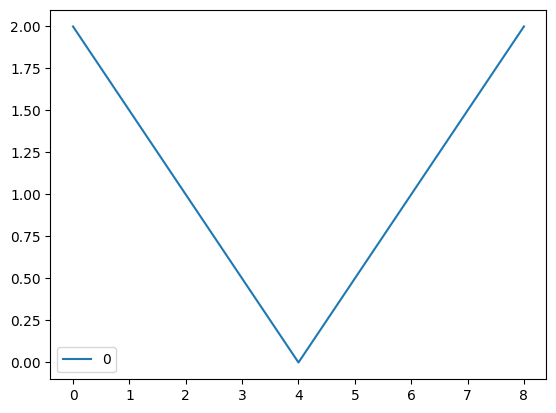

In [2]:
df = pd.DataFrame([[2],[1.5],[1],[0.5],[0],[0.5],[1],[1.5],[2]])
df.plot()

In [3]:
paa = PAA(window_size=3)
df_paa = paa.transform(df)

In [4]:
one_d_sax = OneDSAX(alphabet_size_avg = 2, alphabet_size_slope=3)
df_one_d_sax = one_d_sax.transform(df_paa, df, paa.window_size)
df_one_d_sax

,0
0,ba
1,bb
2,bc


### Segment symbols are the bin for all points in the segment
Need to account for decreasing and increasing slopes

"ba" and "bc" is the same bin, because "a" and "c" are opposite symbols in used alphabet for slope values

In [5]:
df_symbolic_ts = one_d_sax.transform_to_symbolic_ts(df_paa, df, paa.window_size)
df_symbolic_ts

,0
0,ba
1,ba
2,ba
3,bb
4,bb
5,bb
6,bc
7,bc
8,bc


### This can also be seen as they are inverse transformed to the same value despite the different slope symbols

In [6]:
symbol_mapping_avg = IntervalNormMedian(alphabet_size=one_d_sax.alphabet_size_avg)
# var_slope only available after transformation
symbol_mapping_slope = IntervalNormMedian(alphabet_size=one_d_sax.alphabet_size_slope, var=one_d_sax.var_slope)

In [7]:
df_inv = one_d_sax.inv_transform(df, df_one_d_sax, paa.window_size, symbol_mapping_avg, symbol_mapping_slope)
df_inv

c:\users\danie\documents\karlsruhe\03_kit_studium\07_semester\bachelorarbeit\bachelorarbeit\repo\implementation\1_code\src\discretization\sax\one_d_sax.py:208: UserWarning: Make sure you have initialized the chosen 'symbol_mapping_slope' strategy with the variance of the Gaussian distribution that was used to determine the breakpoint intervals for the segment slopes.
  warnings.warn("Make sure you have initialized the chosen "


,0
0,0.771232
1,0.67449
2,0.577748
3,0.67449
4,0.67449
5,0.67449
6,0.577748
7,0.67449
8,0.771232
